<a href="https://colab.research.google.com/github/kavyajeetbora/geemap/blob/master/osmnx/osmnx_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install dependencies

In [2]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 1.7 MB/s eta 0:00:00


## Import dependencies

In [87]:
import osmnx as ox
import geemap
import shapely
from ipyleaflet import GeoJSON, WidgetControl
from ipywidgets import Text, HTML
import json

## Load the map

In [90]:
Map = geemap.Map(center=(28.7, 77.1),zoom=10)
Map

Map(center=[28.7, 77.1], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(…

## Draw the polygon area on map and extract the area of interest

In [92]:
coordinates = Map.draw_features[0].geometry().getInfo()['coordinates'][0]
area = shapely.geometry.Polygon(coordinates)
print(area)

POLYGON ((77.215519 28.634027, 77.217579 28.628754, 77.223029 28.629093, 77.225175 28.630788, 77.224402 28.634404, 77.222772 28.636363, 77.218266 28.635798, 77.215519 28.634027))


## Extract the network from bounded polygon

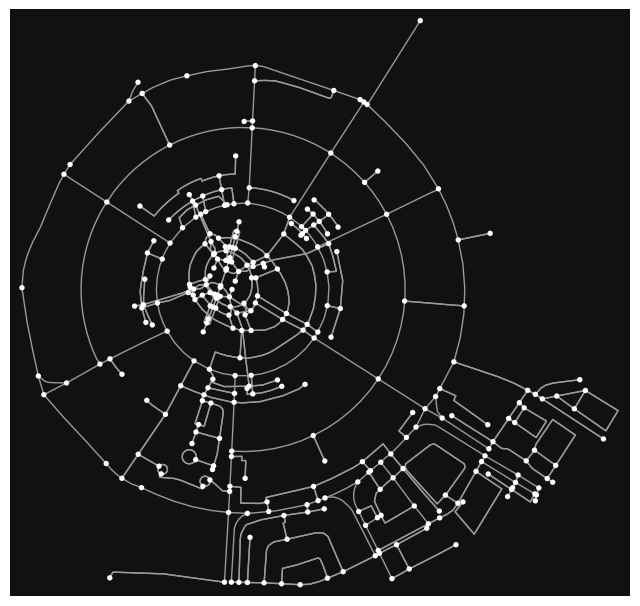

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [93]:
network = ox.graph.graph_from_polygon(area)
ox.plot_graph(network)

In [94]:
network

## Convert `MultiDiGraph` to `GeoDataFrame`

In [95]:
nodes, roads = ox.graph_to_gdfs(network)
roads = roads.reset_index()
roads.sample(3)

,u,v,key,osmid,oneway,name,highway,reversed,length,geometry,lanes,junction,service,tunnel,access
316,5681450581,249783293,0,23133709,True,Outer Circle,secondary,False,27.379,"LINESTRING (77.21977 28.62988, 77.21949 28.62989)",NaN,roundabout,NaN,NaN,NaN
229,1869716920,939091052,0,80499787,False,NaN,footway,True,31.354,"LINESTRING (77.21907 28.63378, 77.21921 28.63353)",NaN,NaN,NaN,NaN,NaN
156,1762945005,1762945112,0,164675808,False,NaN,footway,False,40.273,"LINESTRING (77.21971 28.63262, 77.21973 28.632...",NaN,NaN,NaN,NaN,NaN


## Convert the layer to GeoJSON layer and add to the map

In [100]:
roads_json = json.loads(roads.to_json(drop_id=True))
geojson_layer = GeoJSON(data = roads_json, name='US States', hover_style={'fillColor': 'red', 'fillOpacity': 0.5})
Map.add_layer(geojson_layer)

In [101]:
html1 = HTML('''
    Hover over a road
''')
html1.layout.margin = "0px 20px 20px 0px"
control1 = WidgetControl(widget=html1, position='topright')
Map.add_control(control1)

def update_html(feature, **kwargs):
    html1.value = '''
        <p>Street Type: {}</p>
        <p>Length: {:.2f}</p>
    '''.format(feature['properties']['highway'], feature['properties']['length'])

geojson_layer.on_hover(update_html)